# Moving Average Convergence & Divergence

In [22]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

1. Download data

In [2]:
# tickerStrings = ['AAPL', 'MSFT', 'NIO', 'MSTR','S', 'SOFI', 'FUBO', 'APPS', 'PDD', 'KO', 'TSLA', 'ZI', 'ZM', 'AMD', 'TTD', 'ROKU']
# for ticker in tickerStrings:
#     data = yf.download(ticker, group_by="Ticker", period="3y", start="2018-01-01")
#     data['ticker'] = ticker  # add this column becasue the dataframe doesn't contain a column with the ticker
#     data.to_csv(f'data/ticker_{ticker}.csv')  # ticker_AAPL.csv for example

In [50]:
df = pd.read_csv('data/ticker_SOFI.csv')

2. Calculate EMA

The formula to calculate MACD components are:

$$\text{MACD line = Fast period EMA - Slow period EMA}$$

$$\text{Signal line = Signal period EMA of MACD line}$$

$$\text{MACD histogram = MACD line - Signal line}$$

In [51]:
df['percent_change'] = df['Adj Close'].pct_change()
df['std_5'] = df['percent_change'].rolling(5).std()
df['ema_12'] = df['Adj Close'].ewm(span=10).mean()
df['ema_26'] = df['Adj Close'].ewm(span=26).mean()
df['ema_9'] = df['Adj Close'].ewm(span=9).mean()
df['macd_line'] = df['ema_12'] - df['ema_26']
df['macd_signal_line'] = df['ema_12'] - df['ema_9']

In [54]:
# Drop the missing values
ohlcv_price_data = df
ohlcv_price_data.dropna(inplace=True)
ohlcv_price_data['macd_signal'] = np.where(
    ohlcv_price_data['macd_line'] > ohlcv_price_data['macd_signal_line'], 1, 0)
ohlcv_price_data

,Date,Open,High,Low,Close,Adj Close,Volume,ticker,percent_change,std_5,ema_12,ema_26,ema_9,macd_line,macd_signal_line,macd_signal
5,2021-01-11,19.370001,19.750000,18.650000,18.990000,18.990000,11702200,SOFI,0.013340,0.260891,16.542884,15.944505,16.645897,0.598379,-0.103013,1
6,2021-01-12,18.980000,19.190001,18.250000,18.450001,18.450001,7138600,SOFI,-0.028436,0.263832,17.002422,16.390094,17.102468,0.612328,-0.100045,1
7,2021-01-13,18.900000,19.590000,18.530001,19.110001,19.110001,8226400,SOFI,0.035772,0.260355,17.481906,16.828339,17.584915,0.653568,-0.103009,1
8,2021-01-14,19.400000,19.450001,18.920000,19.160000,19.160000,7705100,SOFI,0.002616,0.026023,17.847001,17.173942,17.948768,0.673059,-0.101767,1
9,2021-01-15,19.320000,21.049999,19.110001,20.160000,20.160000,13024900,SOFI,0.052192,0.031054,18.332861,17.585989,18.444212,0.746872,-0.111352,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2021-07-26,15.760000,16.090000,15.480000,15.510000,15.510000,8994900,SOFI,-0.012102,0.053364,15.970860,17.229123,15.900307,-1.258262,0.070553,0
141,2021-07-27,15.490000,15.500000,14.720000,14.920000,14.920000,16735400,SOFI,-0.038040,0.056868,15.779795,17.058073,15.704246,-1.278279,0.075549,0
142,2021-07-28,15.120000,15.479000,15.080000,15.370000,15.370000,10131600,SOFI,0.030161,0.026802,15.705287,16.933029,15.637397,-1.227742,0.067890,0
143,2021-07-29,15.875000,16.240000,15.510000,15.600000,15.600000,12748300,SOFI,0.014964,0.027653,15.686144,16.834284,15.629917,-1.148141,0.056226,0


## Long Entry Signals
You will generate the buy signals using the MACD line and the signal line. When the MACD line is crosses the signal line from below, a buy signal is generated.

Buy if: MACD line > Signal line
 
You can use where method of NumPy to do the same.

Syntax:
```
import numpy as np
np.where(condition, value_if_true, value_if_false)
Parameters:

condition: Condition to check
value_if_true: Value if the condition is satisfied
value_if_false: Value if the condition is not satisfied
```

# Visualization

No handles with labels found to put in legend.


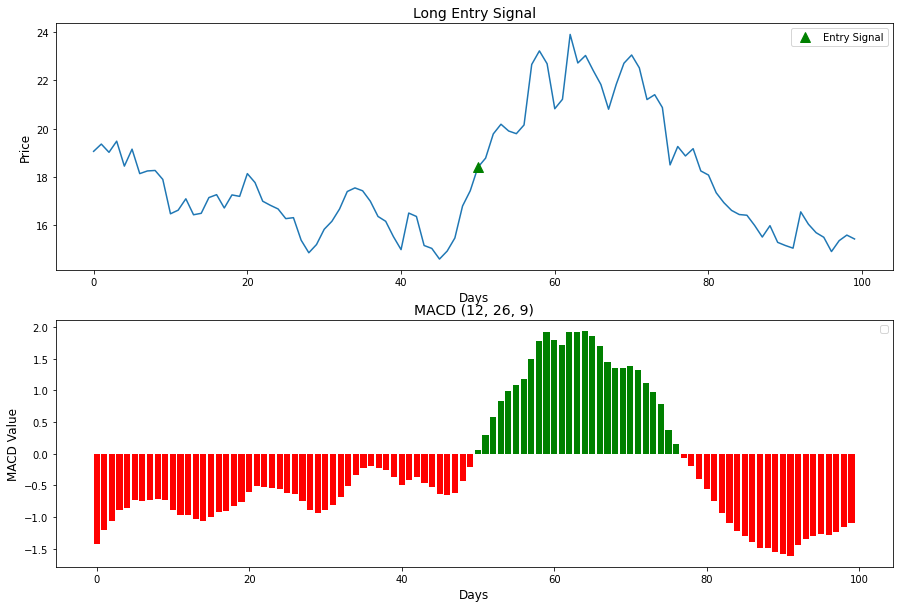

In [55]:
# Show the last 100 points for illustration purposes
data_for_plot = ohlcv_price_data[-100:]
# data_for_plot['macd_hist'] = data_for_plot['macd_line']
num_of_x_values = data_for_plot['Close'].shape[0]

# Define the plot figure
fig = plt.figure(figsize=(15, 10))

# Sub plot for the close price and entry signal
ax1 = fig.add_subplot(211)

# Set the title and axis labels
ax1.set_title('Long Entry Signal', fontsize=14)
ax1.set_xlabel('Days', fontsize=12)
ax1.set_ylabel('Price', fontsize=12)

# Plot close price
ax1.plot(range(num_of_x_values), data_for_plot['Close'])

# Plot long entry points
entry_condition_to_plot = np.where((data_for_plot['macd_signal'] == 1) &
                                   (data_for_plot['macd_signal'].shift(1) == 0),
                                   data_for_plot['Adj Close'], np.nan)

ax1.plot(range(num_of_x_values), entry_condition_to_plot, '^',
         ms=10, label='Entry Signal', color='green')
ax1.legend()

# Sub plot for the MACD line, signal line and MACD histogram
ax2 = fig.add_subplot(212)
ax2.set_title(('MACD (12, 26, 9)'), fontsize=14)
ax2.set_xlabel('Days', fontsize=12)
ax2.set_ylabel('MACD Value', fontsize=12)

# Colour of the MACD histogram
macd_hist_colour = ['green' if (
    x > 0) else 'red' for x in data_for_plot.macd_line]

# Plot MACD histogram
ax2.bar(range(num_of_x_values), data_for_plot['macd_line'], color=macd_hist_colour)
ax2.legend()

plt.show()